<a href="https://colab.research.google.com/github/Paaaark/Kaggle/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn import model_selection
import csv

In [36]:
%run /content/drive/MyDrive/Kaggle/titanic/helper.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# TensorFlow Deep Neural Network

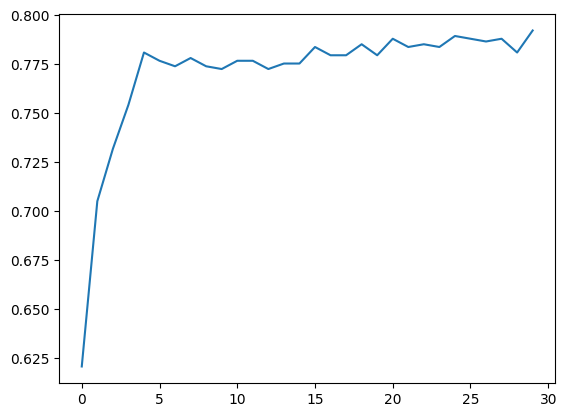

In [69]:
train_x, train_y = process_data(df)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[6,]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(train_x, train_y, epochs=30, verbose=False,
                 validation_split=0.2)
plt.plot(hist.history['acc'])
plt.show()

# Scikit-learn Models Benchmark

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = [RandomForestClassifier(max_depth=2, random_state=0),
          DecisionTreeClassifier(random_state=0),
          GaussianNB(),
          KNeighborsClassifier(n_neighbors=5),
          SVC(gamma='auto'),
          MLPClassifier(random_state=1, max_iter=500, solver='lbfgs', early_stopping=True)]
model_names = ['Random Forest', 'Decision Tree', 'GaussianNB', 'K-Neighbors',
               'SVM', 'Neural Network']

train_x, test_x, train_y, test_y = process_data(df, 0.2)
for model, model_name in zip(models, model_names):
  # model = RandomForestClassifier(max_depth=2, random_state=0)
  # model.compile(metrics=["acc"])
  model = model.fit(train_x, train_y)
  print(model_name)
  print("Train Acc: ", model.score(train_x, train_y))
  print("Test Acc: ", model.score(test_x, test_y))

Random Forest
Train Acc:  0.8033707865168539
Test Acc:  0.8268156424581006
Decision Tree
Train Acc:  0.9269662921348315
Test Acc:  0.8044692737430168
GaussianNB
Train Acc:  0.7626404494382022
Test Acc:  0.770949720670391
K-Neighbors
Train Acc:  0.8398876404494382
Test Acc:  0.8212290502793296
SVM
Train Acc:  0.8033707865168539
Test Acc:  0.8212290502793296
Neural Network
Train Acc:  0.8820224719101124
Test Acc:  0.7821229050279329


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [74]:
train_x, test_x, train_y, test_y = process_data(df, 0.2)
for n in range(2, 8):
  model = KNeighborsClassifier(n_neighbors=n)
  model = model.fit(train_x, train_y)
  print(n)
  print("Train Acc: ", model.score(train_x, train_y))
  print("Test Acc: ", model.score(test_x, test_y))

2
Train Acc:  0.8426966292134831
Test Acc:  0.776536312849162
3
Train Acc:  0.8426966292134831
Test Acc:  0.8156424581005587
4
Train Acc:  0.8342696629213483
Test Acc:  0.8044692737430168
5
Train Acc:  0.8300561797752809
Test Acc:  0.8100558659217877
6
Train Acc:  0.8132022471910112
Test Acc:  0.7877094972067039
7
Train Acc:  0.8174157303370787
Test Acc:  0.7932960893854749


# Decision Tree Models Benchmark

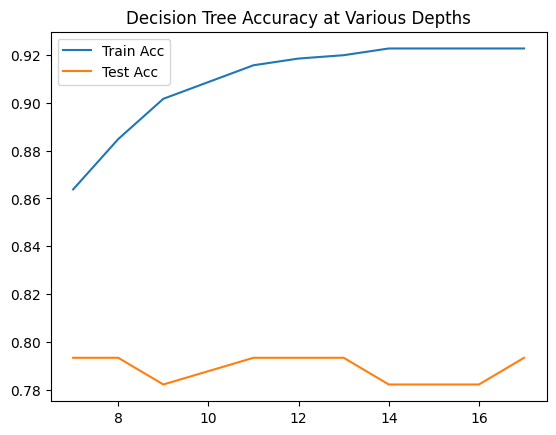

In [95]:
train_x, test_x, train_y, test_y = process_data(df, 0.2)
options = ["gini"]
test_acc = []
train_acc = []
for i in range(7, 18, 1):
  model = DecisionTreeClassifier(max_depth=i)
  model = model.fit(train_x, train_y)
  test_acc.append(model.score(test_x, test_y))
  train_acc.append(model.score(train_x, train_y))
plt.plot(range(7, 18, 1), train_acc)
plt.plot(range(7, 18, 1), test_acc)
plt.title("Decision Tree Accuracy at Various Depths")
plt.legend(['Train Acc', 'Test Acc'])

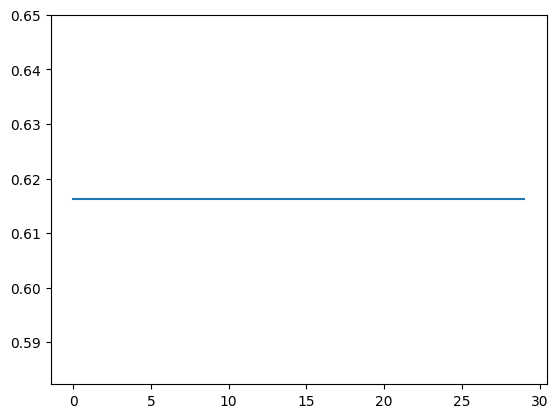

In [ ]:
save_model(model, hist.history['acc'], '7-30-30-1;RELU;SGD')